In [87]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.result import marginal_counts
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector

In [100]:
## FUNCTIONS

def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a, b)


def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)


def measure_and_send(qc, a, b):
    """Measures qubits a and b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a, 0)
    qc.measure(b, 1)


# functions that decides what gates to apply
def bob_gates(qc, qubit, crz, crx):
    # here we use c_if to control our gates with a classical bit instead of a qubit
    # apply gates if the registers are in state '1'
    qc.x(qubit).c_if(crx, 1)  # Apply X if crx == 1
    qc.z(qubit).c_if(crz, 1)  # Apply Z if crz == 1


def new_bob_gates(qc, a, b, c):
    qc.cx(b, c)
    qc.cz(a, c)

<IPython.core.display.Latex object>

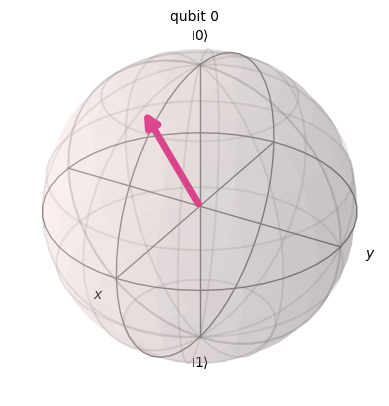

In [101]:
## CREATION OF RANDOM VECTOR
psi = random_statevector(2)

# display it
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

C:\Users\A200134741\AppData\Local\Temp\ipykernel_25360\3318934396.py:24: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(crx, 1)  # Apply X if crx == 1
C:\Users\A200134741\AppData\Local\Temp\ipykernel_25360\3318934396.py:25: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qubit).c_if(crz, 1)  # Apply Z if crz == 1


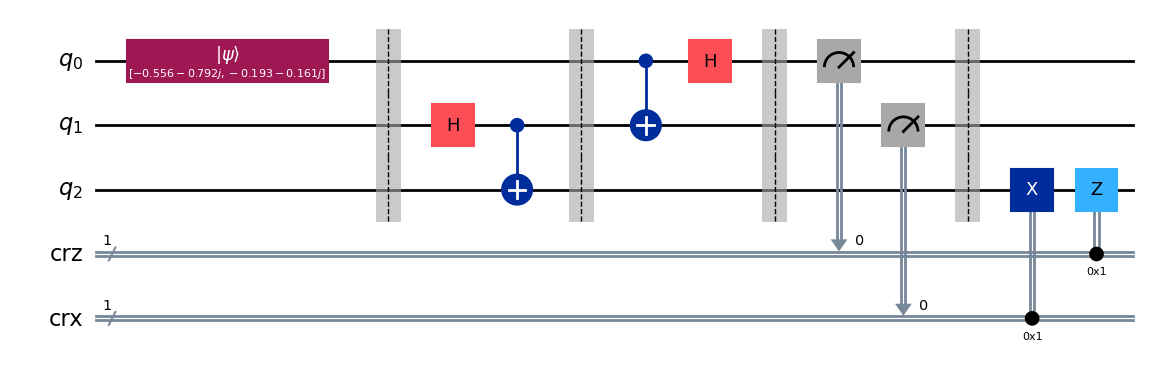

In [102]:
## SETUP
# 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 0
# initialize Alice's qubit 0 (the one to be teleported)
# to some random value
teleportation_circuit.initialize(psi, [0])
teleportation_circuit.barrier()

## STEP 1
# Entangling qubits
# Alice has qubits 0 and 1, Bob has qubit 2
# Alice and Bob share entangled qubits
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier()

## STEP 2
# Alice changes basis to {|+>, |->}
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
# Alice does measurement
measure_and_send(teleportation_circuit, 0, 1)


## STEP 4
# Bob applies gates and decodes qubits
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)

teleportation_circuit.draw(output='mpl')

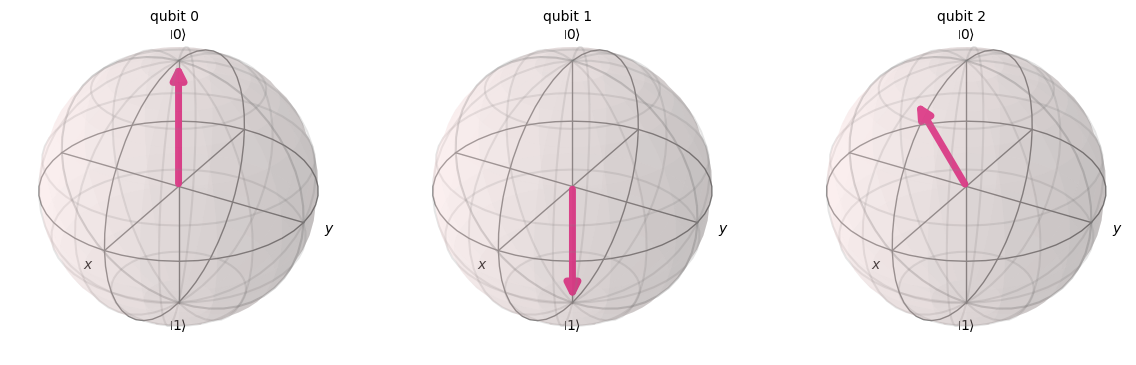

In [110]:
## SIMULATION
backend = Aer.get_backend('statevector_simulator')
transpiled_circuit = transpile(teleportation_circuit.remove_final_measurements(inplace=False), backend)
result = backend.run(transpiled_circuit).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)